In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Model load karo (apna model ka exact naam check karo)
model = tf.keras.models.load_model("models/potato_cnn_model.keras")

# Test folder path
test_dir = "assets/test_images"   # agar yahi use karna hai
# test_dir = "test"               # agar alag test folder banaya hai

img_size = 224
batch_size = 32

# Test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

print("Class Labels:", test_generator.class_indices)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save image
plt.savefig("confusion_matrix.png")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

Found 3 images belonging to 3 classes.


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 with name 'None' of layer 'dense' is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (3, 86528)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(3, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [3]:
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os

for root, dirs, files in os.walk("assets/test_images"):
    print(root)
    print("Folders:", dirs)
    print("Files:", files)
    print("------")

assets/test_images
Folders: []
Files: ['Early blight.jpeg', 'healthy.avif', 'late blight.jpeg']
------


In [5]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,083 (37.82 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,056 (25.22 MB)

Found 3 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


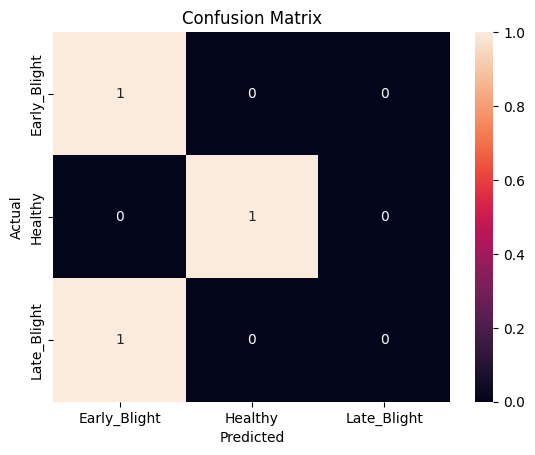


Classification Report:

              precision    recall  f1-score   support

Early_Blight       0.50      1.00      0.67         1
     Healthy       1.00      1.00      1.00         1
 Late_Blight       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [12]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ==============================
# 1️⃣ Load Trained Model
# ==============================
model = tf.keras.models.load_model("models/potato_cnn_model.keras")

# ==============================
# 2️⃣ Test Folder Path
# ==============================
test_dir = "assets/test_images"

# ==============================
# 3️⃣ Image Size (VERY IMPORTANT)
# ==============================
img_size = 128   # Model trained on 128x128

# ==============================
# 4️⃣ Create Test Generator
# ==============================
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ==============================
# 5️⃣ Make Predictions
# ==============================
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# ==============================
# 6️⃣ Confusion Matrix
# ==============================
cm = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==============================
# 7️⃣ Classification Report
# ==============================
print("\nClassification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=test_generator.class_indices.keys()
))
plt.savefig("assets/confusion_matrix.png")
plt.close()
plt.figure()
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.savefig("assets/confusion_matrix.png")
plt.close()

In [7]:
import os
print("Current Path:", os.getcwd())

Current Path: C:\Users\123\Desktop\Potato_Disease_Project


In [8]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'app.py', 'assets', 'confusion_matrix.ipynb', 'models', 'pages', 'results', 'run_app.py', 'run_app.spec', 'test']


In [9]:
import os
print(os.listdir("models"))

['gwo_best_solution.pkl', 'lr_gwo_model.pkl', 'pca_model.pkl', 'potato_cnn_model.keras']


In [13]:
import os
print(os.listdir("assets"))

['confusion_matrix.png', 'test_images']
